# Entropy of written English

Entropy is a measure of the uncertainty or randomness of a system. In the context of written English, entropy can refer to the amount of unpredictability or variability in the language.

In [104]:
import requests
import re
import numpy
import matplotlib.pyplot
import string
import pandas

In [3]:
rawData = requests.get('https://www.gutenberg.org/files/35/35-0.txt')
rawData

<Response [200]>

In [56]:
rawData.text[:100]

'ï»¿The Project Gutenberg eBook of The Time Machine, by H. G. Wells\r\n\r\nThis eBook is for the use of a'

In [60]:
text = rawData.text

patterns = ["\r\n\r\n",r"\r\n",r"\r\n\r\nâ\x80\x9c",r"â\x80\x9c",r"â\x80\x94",r"â\x80\x9d",r"â\x80\x99",r"â\x80\x98","_",r'ï»¿']

In [61]:
for i in patterns:
    pattern = re.compile(r'%s'%i)
    text = pattern.sub(' ', text)

In [62]:
text[:100]

' The Project Gutenberg eBook of The Time Machine, by H. G. Wells This eBook is for the use of anyone'

## Distribution of Word Lengths

In [63]:
words = text.split()
words[:5]

['The', 'Project', 'Gutenberg', 'eBook', 'of']

In [65]:
count = numpy.zeros(40)

for i in words:
    count[len(i)]+=1

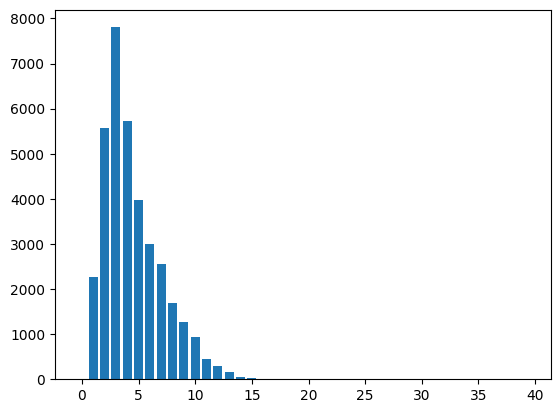

In [71]:
matplotlib.pyplot.bar(range(len(count)),count);

## Letter Frequencies

In [102]:
letters = list(text)
letters[:10]
diction = {}
for i in letters:
    if i in string.ascii_letters:
        i = i.lower()
        diction[str(i)]=diction.get(i, 0)
        diction[str(i)]+=1
    else:
        continue
pandas.Series(data=diction).plot(kind='bar')

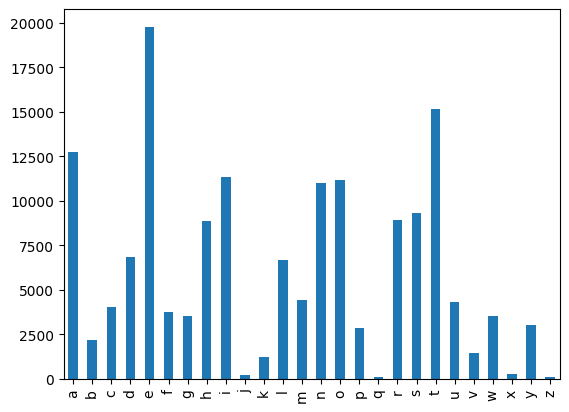

In [144]:
lf;

In [135]:
probability = {}
for i in string.ascii_lowercase:
    probability[str(i)] = diction[i]/sum(diction.values())

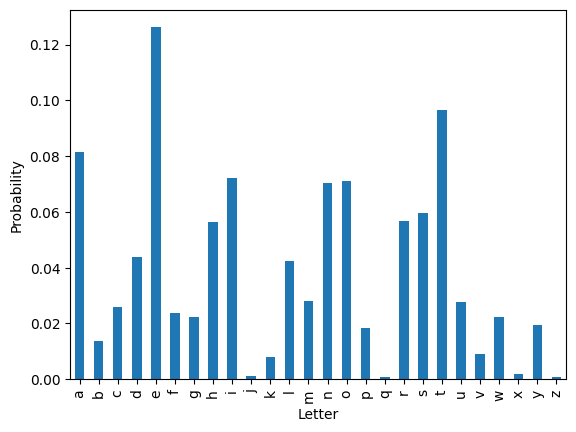

In [143]:
pandas.Series(data=probability).sort_index().plot(kind='bar',xlabel='Letter',ylabel='Probability');

In [151]:
# Entrophy
entrophy = -sum(list(probability.values())*numpy.log2(list(probability.values())))
entrophy

4.173084127748868

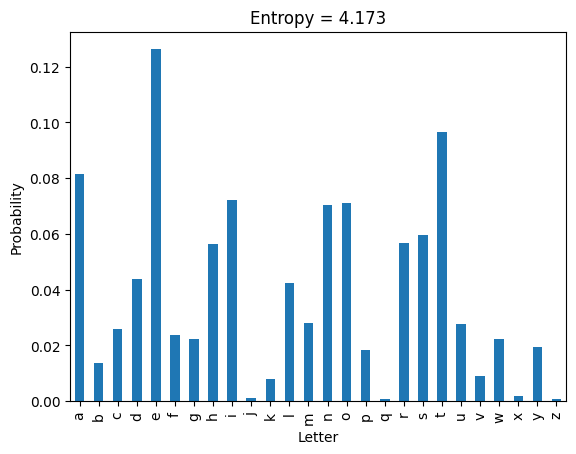

In [153]:
pandas.Series(data=probability).sort_index().plot(kind='bar',xlabel='Letter',ylabel='Probability',title='Entropy = %.3f'%entrophy);

# Conditional Entropy

In [169]:
letters = string.ascii_lowercase
num_letters = len(string.ascii_lowercase)
probability_matrix = numpy.zeros([num_letters,num_letters])


for i in range(len(text)-1):
    currlet = text[i]
    nextlet = text[i+1]
    if currlet in letters and nextlet in letters:
        probability_matrix[letters.index(currlet),letters.index(nextlet)]+=1

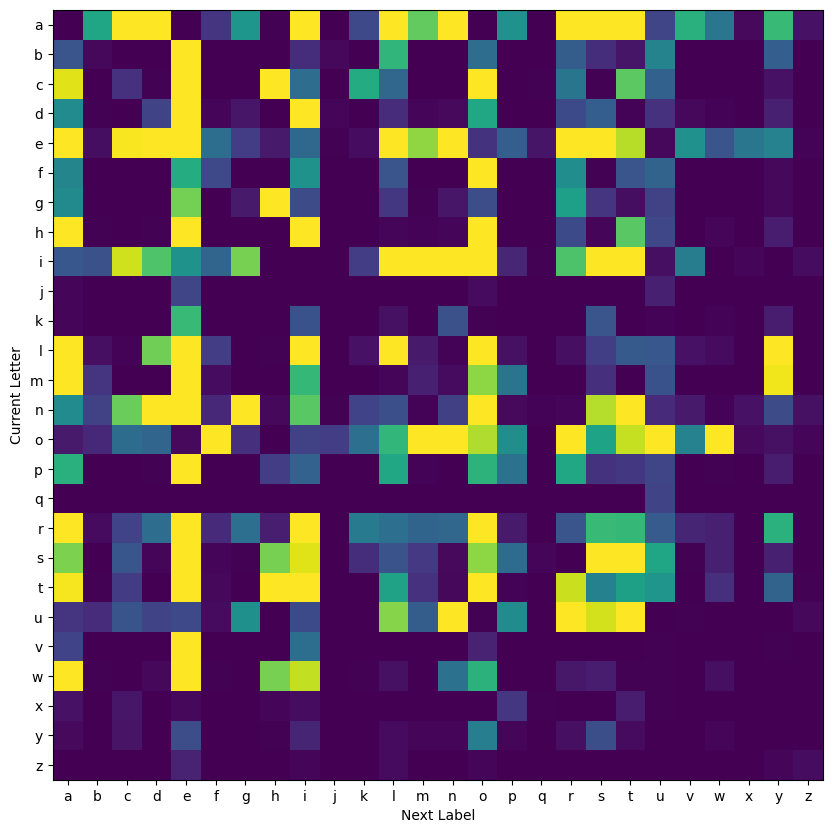

In [177]:
fig,ax = matplotlib.pyplot.subplots(1,figsize=(10,10))

ax.imshow(probability_matrix,vmax=500)
ax.set_ylabel('Current Letter')
ax.set_xlabel('Next Letter')
ax.set_xticks(range(num_letters))
ax.set_yticks(range(num_letters))
ax.set_xticklabels(letters)
ax.set_yticklabels(letters)

matplotlib.pyplot.show()

In [178]:
condentr = numpy.zeros(num_letters)

for i in range(num_letters):
    probs = probability_matrix[i,:]
    probs = probs / sum(probs)
    condentr[i] = -sum(probs*numpy.log2(probs+numpy.finfo(float).eps))

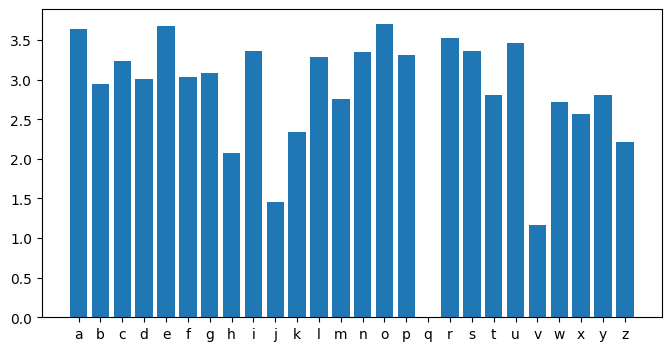

In [187]:
fig,ax = matplotlib.pyplot.subplots(1,figsize=(8,4))
ax.bar(range(num_letters),condentr)
ax.set_xticks(range(num_letters))
ax.set_xticklabels(letters);

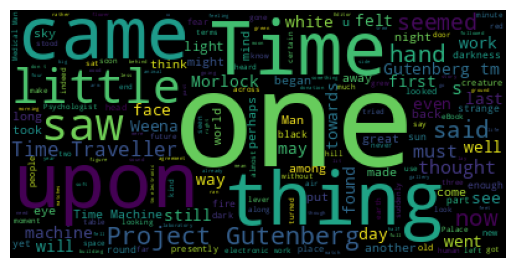

In [188]:
from wordcloud import WordCloud

wordcloud = WordCloud().generate(text)

matplotlib.pyplot.imshow(wordcloud)
matplotlib.pyplot.axis('off')
matplotlib.pyplot.show()